# TV Ratings

Create an application that:
* reads in a list of TV shows
* makes multiple requests from an API to retrieve rating information
* creates a Pandas DataFrame
* visually displays the data.

### Instructions:

* You may use the list of TV shows provided in the starter file or create your own.

* Request information on each TV show from the [TVmaze API's Show Search endpoint](https://www.tvmaze.com/api#show-search)
* Store the name and rating information into lists.

* Store this data in a dictionary and use it to create a Pandas DataFrame.

* Use matplotlib to create a bar chart comparing the ratings of each show.

### Plot output

<center><img src="tv_show_ratings.png"></img></center>

#### Import Dependencies

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Create list of TV shows and establish the base URL

In [2]:
# list of tv show titles to query
tv_shows = ["Altered Carbon", "Grey's Anatomy", "This is Us", "The Flash",
            "Vikings", "Shameless", "Arrow", "Peaky Blinders", "Dirk Gently"]

# tv maze show search base url
base_url = "http://api.tvmaze.com/search/shows?q="

#### Loop through TV show titles and append titles and ratings to lists

In [3]:
# set up lists to hold response data for name and rating
titles = []
ratings = []

# loop through tv show titles, make requests and parse
for show in tv_shows:
    target_url = base_url + show
    response = requests.get(target_url).json()
    titles.append(response[0]['show']['name'])
    ratings.append(response[0]['show']['rating']['average'])

#### Create DataFrame from titles and ratings

In [4]:
shows_df = pd.DataFrame({
    "title": titles,
    "rating": ratings
})

shows_df

,title,rating
0,Altered Carbon,8.1
1,Grey's Anatomy,8.3
2,This Is Us,8.3
3,The Flash,8.1
4,Vikings,8.8
5,Shameless,8.7
6,Arrow,7.5
7,Peaky Blinders,9.0
8,Dirk Gently,7.2


#### Create a bar chart to plot each show's rating

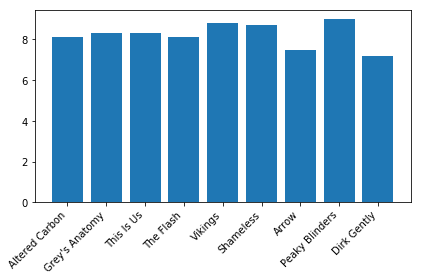

In [6]:
# create a list of numbers for x values
tick_locations = np.arange(len(shows_df))

# create bar chart and set the values of xticks
plt.bar(tick_locations, shows_df['rating'], align="center")
plt.xticks(tick_locations, shows_df['title'], rotation=45, ha="right")

plt.tight_layout()

plt.savefig("tv_show_ratings.png")
plt.show()